## Inversion Española en México vs Inversión Extranjera Directa de México

Analizar si hay correlacion entre las variables de la inversion Extranjera Directa y la inversion de empresas españolas en México

https://www.cienciadedatos.net/documentos/pystats05-correlacion-lineal-python.html

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
import statsmodels.api as sm
import pingouin as pg
from scipy import stats
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler



# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
%store -r df_var

In [3]:
df_vs = df_var[['Inversion Es(millones€)', 'IED(millones€)']]

In [4]:
df_vs.head()

variables,Inversion Es(millones€),IED(millones€)
1993,94.32,3903.58
1994,34.05,8807.63
1995,16.53,7113.28
1996,27.26,7275.91
1997,93.71,11720.02


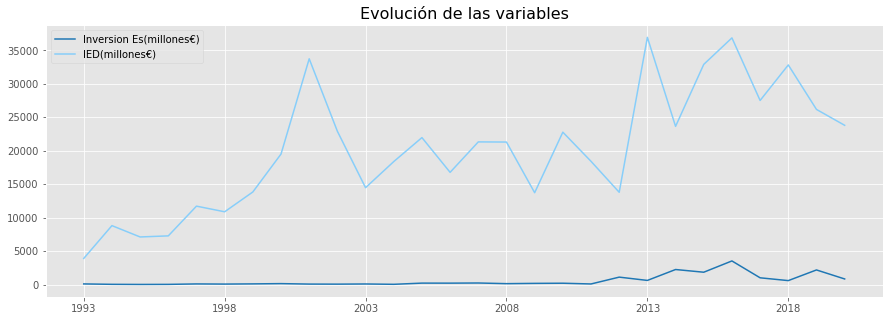

In [5]:
plt.figure(figsize=(15,5))

df_vs['Inversion Es(millones€)'].plot(color='tab:blue')
df_vs['IED(millones€)'].plot(color='lightskyblue')

plt.title("Evolución de las variables", size = 16)
plt.legend() 
plt.show()

In [6]:
df_vs['%inv_ES'] = df_vs['Inversion Es(millones€)']/df_vs['IED(millones€)']*100

In [7]:
df_vs

variables,Inversion Es(millones€),IED(millones€),%inv_ES
1993,94.32,3903.58,2.416244
1994,34.05,8807.63,0.386597
1995,16.53,7113.28,0.232382
1996,27.26,7275.91,0.374661
1997,93.71,11720.02,0.799572
1998,71.46,10876.42,0.657018
1999,100.38,13837.88,0.725400
2000,140.04,19505.44,0.717954
2001,70.30,33742.37,0.208343
2002,61.56,22910.10,0.268702


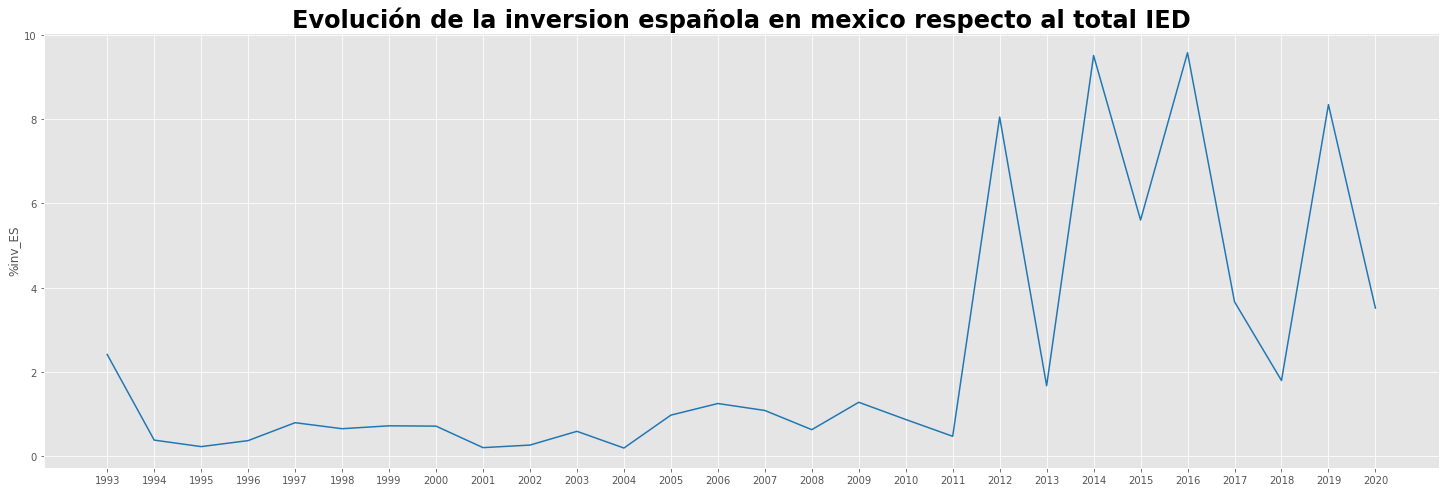

In [8]:
plt.figure(figsize=(25,8))
sns.lineplot(data=df_vs['%inv_ES'], color='tab:blue')
plt.title('Evolución de la inversion española en mexico respecto al total IED', fontsize=24, fontweight='bold')
plt.show()

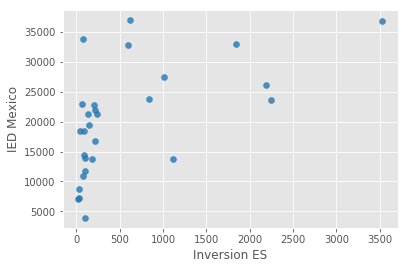

In [9]:
# Gráfico 
# ==============================================================================
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=df_vs['Inversion Es(millones€)'], y=df_vs['IED(millones€)'], alpha= 0.8, color='tab:blue')
ax.set_xlabel('Inversion ES')
ax.set_ylabel('IED Mexico');

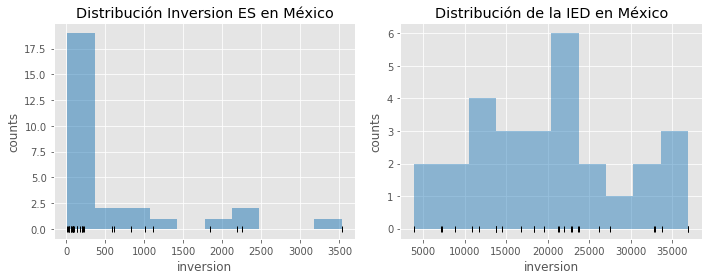

In [8]:
# Gráfico distribución variables
# ==============================================================================
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].hist(x=df_vs['Inversion Es(millones€)'], bins=10, color='tab:blue', alpha=0.5)
axs[0].plot(df_vs['Inversion Es(millones€)'], np.full_like(df_vs['Inversion Es(millones€)'], -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Distribución Inversion ES en México')
axs[0].set_xlabel('inversion')
axs[0].set_ylabel('counts')

axs[1].hist(x=df_vs['IED(millones€)'], bins=10, color="#3182bd", alpha=0.5)
axs[1].plot(df_vs['IED(millones€)'], np.full_like(df_vs['IED(millones€)'], -0.01), '|k', markeredgewidth=1)
axs[1].set_title('Distribución de la IED en México')
axs[1].set_xlabel('inversion')
axs[1].set_ylabel('counts')


plt.tight_layout();

In [11]:
# Cálculo de correlación 
# ==============================================================================
print('Correlación Pearson: ', df_vs['Inversion Es(millones€)'].corr(df_vs['IED(millones€)'], method='pearson'))
print('Correlación spearman: ', df_vs['Inversion Es(millones€)'].corr(df_vs['IED(millones€)'], method='spearman'))
print('Correlación kendall: ', df_vs['Inversion Es(millones€)'].corr(df_vs['IED(millones€)'], method='kendall'))

Correlación Pearson:  0.5604929126480166
Correlación spearman:  0.6392993979200876
Correlación kendall:  0.49735449735449727


In [12]:
# Cálculo de correlación, significancia e intervalos con pingouin
# ==============================================================================
display(pg.corr(df_vs['Inversion Es(millones€)'], df_vs['IED(millones€)'], method='pearson'))
display(pg.corr(df_vs['Inversion Es(millones€)'], df_vs['IED(millones€)'], method='spearman'))
display(pg.corr(df_vs['Inversion Es(millones€)'], df_vs['IED(millones€)'], method='kendall'))

,n,r,CI95%,p-val,BF10,power
pearson,28,0.560493,"[0.24, 0.77]",0.001921,22.76,0.895259


,n,r,CI95%,p-val,power
spearman,28,0.639299,"[0.35, 0.82]",0.00025,0.96991


,n,r,CI95%,p-val,power
kendall,28,0.497354,"[0.15, 0.73]",0.000122,0.791121
